# Problem 21, Ch. 1

Three people get itno an empty elevator at the first floor of a building that has $10$ floors. Each presses the buttion for their desired floor (unless one of the others has already pressed that button). Assume that they are equally likely to want to go to floors $2$ through $10$ (independently of each other).

What is the probability that the buttons for 3 consecutive floors are pressed?

## Analytical Solution

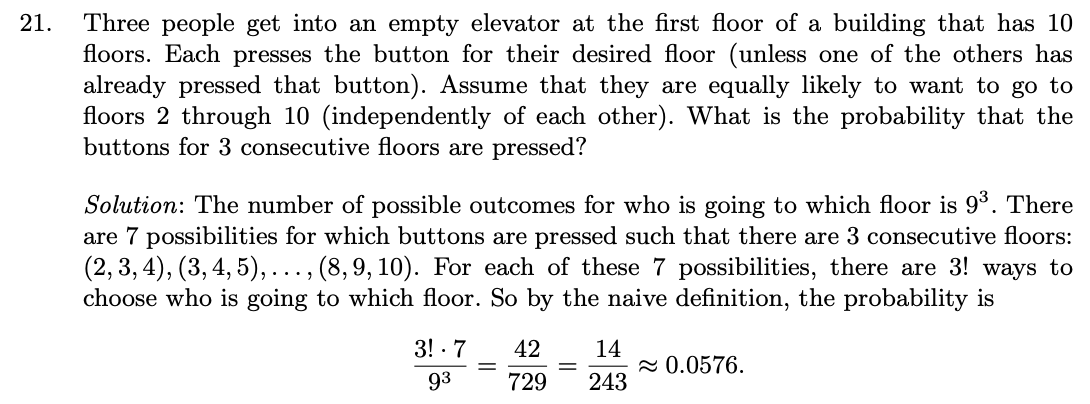

## Numerical Solution

I compute a numerical solution using decorators (for practice):

In [1]:
import random
import functools
from typing import Set

In [2]:
def consecutive_floors_experiment(n: int = 1_000_000):
    """
    Decorator to run elevator experiment consisting of `n` trials
    """
    def decorator_repeat(func):
        consecutive_floors = tuple({x, x+1, x+2} for x in range(2, 8 + 1))
        @functools.wraps(func)
        def wrapper_repeat(*args, **kwargs):
            successes = 0
            for _ in range(n):
                desired_floors = func(*args, **kwargs)
                if desired_floors in consecutive_floors:
                    successes += 1
            return successes / n
        return wrapper_repeat
    return decorator_repeat


@consecutive_floors_experiment()
def passenger_elevator_trial(k: int = 3) -> Set[int]:
    """
    Return desired floors for a group of `k` elevator passengers
    """
    floors = list(range(2, 10 + 1))
    return set(random.choice(floors) for _ in range(k))

In [3]:
passenger_elevator_trial()

0.057698